<a href="https://colab.research.google.com/github/canaranjo23/AA-IG-CamiloNaranjo/blob/main/TP3_Parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------
Shape x:  (500,)
Shape t:  (500,)
Shape p:  (500,)
-------------------------------------------

xm shape:  (10,)
xmm shape:  (50,)

Primeros 15 datos de xmm:  [0.19190324 0.19190324 0.19190324 0.19190324 0.19190324 0.70014438
 0.70014438 0.70014438 0.70014438 0.70014438 0.99393538 0.99393538
 0.99393538 0.99393538 0.99393538] 

Número de unicos valores de x:  10 

-------------------------------------------
tm shape:  (10, 5)
tmm shape:  (50,) 

t originales:  [ 4.459774e+00 -2.578854e+00 -4.747090e+00 -3.530326e+00  4.744444e-03
 -3.671662e+00 -3.580519e+00  2.540529e-01 -5.121497e+00 -1.289123e+00
  7.610360e+00  1.270783e+00  7.319286e+00  5.167076e+00  1.634240e+00] 

t tranformados:  [-4.501103 -2.021905  2.187538 -4.917785  1.568132]
-------------------------------------------



Text(0, 10.4, 'c')

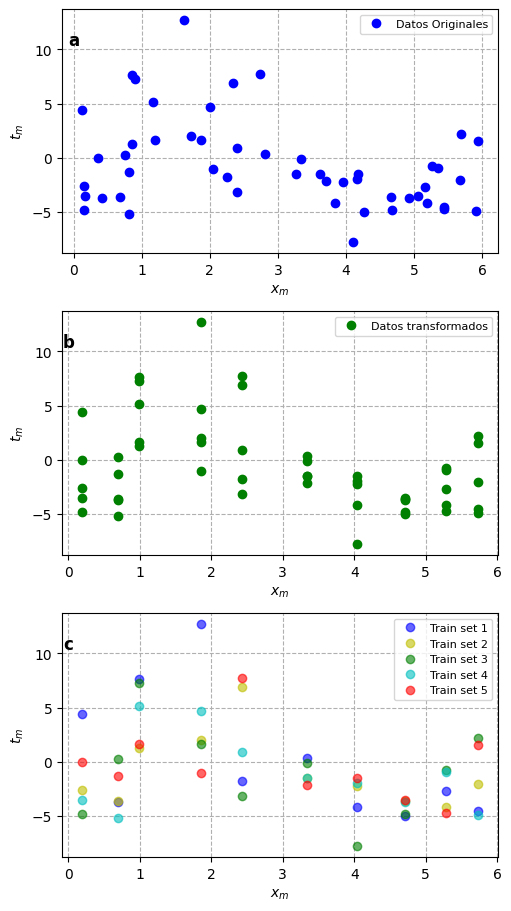

In [98]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Definimos la ruta de GitHub
path = 'https://raw.githubusercontent.com/canaranjo23/AA-IG-CamiloNaranjo/main/Data-TP3/'

# Se leen los datos
x1 = ((pd.read_csv(path+'dataset-2-training-Entradas.txt', sep=' ', header=None)).to_numpy()).flatten()    # Entradas de entrenamiento
t1 = ((pd.read_csv(path+'dataset-2-training-targets.txt', sep=' ', header=None)).to_numpy()).flatten()     # Targets de entrenamiento
p1 = ((pd.read_csv(path+'dataset-2-Entradas.txt', sep=' ', header=None)).to_numpy()).flatten()             # Entradas para predicción

print('-------------------------------------------')
print('Shape x: ', x1.shape)
print('Shape t: ', t1.shape)
print('Shape p: ', p1.shape)
print('-------------------------------------------\n')

# Organizamos los datos de menor a mayor valor. Esto se realiza con el objetivo 
# de agrupar los datos cada 5 valores, para construir el dataset que permita 
# calcular el Sesgo y la Varianza. 
ind = np.argsort(x1)        # Se extraen los indices de acuerdo a los x
xs = x1[ind]                # Se organiza el vector de x
ts = t1[ind]                # Se organiza el vector de t

# Generación del subset
lar = 50
xs = xs[0:lar]
ts = ts[0:lar]

# Plot 
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(5.0,9.0), 
                                  dpi=100, constrained_layout=True)

# Plot - De los 500 Datos originales
ax1.plot(xs, ts, 'bo', label='Datos Originales', zorder=4)
ax1.set_xlabel(r'$x_m$')
ax1.set_ylabel('$t_m$')
ax1.grid(True, linestyle='--')
ax1.legend(fontsize=8)
ax1.text(0, 10.4, 'a', fontsize=12, fontweight='bold', ha='center')

# Agrupamiento de los datos en x
# Se agrupan los datos del vector x cada 5 posiciones del vector. Por lo tanto,
# tendremos 100 grupos de 5 elementos. Luego cada grupo es promediado. De esta
# manera tendremos 100 valores de x, y 5 mediciones para cada valor. 
xm = np.average(xs.reshape(-1, 5), axis=1)    # Se promedian cada 5 datos. xm cuenta con 100 datos de x.
print('xm shape: ', xm.shape)

# Se reconstruye el vector x para que tenga una dimensión de 500
xmm = np.column_stack((xm,xm,xm,xm,xm)).flatten()      # xmm cuenta con 500 datos
print('xmm shape: ', xmm.shape)
print('\nPrimeros 15 datos de xmm: ',xmm[0:15],'\n')
print('Número de unicos valores de x: ', len(np.unique(xmm)),'\n')

# Se transforma el vector de t
tmm = ts*1                              # Contiene los 500 datos completos y originales de t
tm = tmm.reshape((int(lar/5),5))               # Vector transformado para cada conjunto de datos de t. Matriz con 5 columnas de 100 datos
print('-------------------------------------------')
print('tm shape: ', tm.shape)
print('tmm shape: ', tmm.shape, '\n')

# Para verificar 
print('t originales: ', tmm[0:15], '\n')
print('t tranformados: ', tm[-1,:])
print('-------------------------------------------\n')

# Se ordena p1
ind = np.argsort(p1)        # Se extraen los indices de acuerdo a los x
ps = p1[ind]                # Se organiza el vector de x

# Plot - De los 500 Datos transformados para el ejercicio
ax2.plot(xmm, tmm, 'go', label='Datos transformados', zorder=4)
ax2.set_xlabel(r'$x_m$')
ax2.set_ylabel('$t_m$')
ax2.grid(True, linestyle='--')
ax2.legend(fontsize=8)
ax2.text(0, 10.4, 'b', fontsize=12, fontweight='bold', ha='center')

# Plot - De los 500 Datos transformados diferenciados para cada medición
ax3.plot(xm, tm[:,0], 'bo', label='Train set 1', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,1], 'yo', label='Train set 2', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,2], 'go', label='Train set 3', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,3], 'co', label='Train set 4', zorder=4, alpha=0.6)
ax3.plot(xm, tm[:,4], 'ro', label='Train set 5', zorder=4, alpha=0.6)
ax3.set_xlabel(r'$x_m$')
ax3.set_ylabel('$t_m$')
ax3.grid(True, linestyle='--')
ax3.legend(fontsize=8)
ax3.text(0, 10.4, 'c', fontsize=12, fontweight='bold', ha='center')

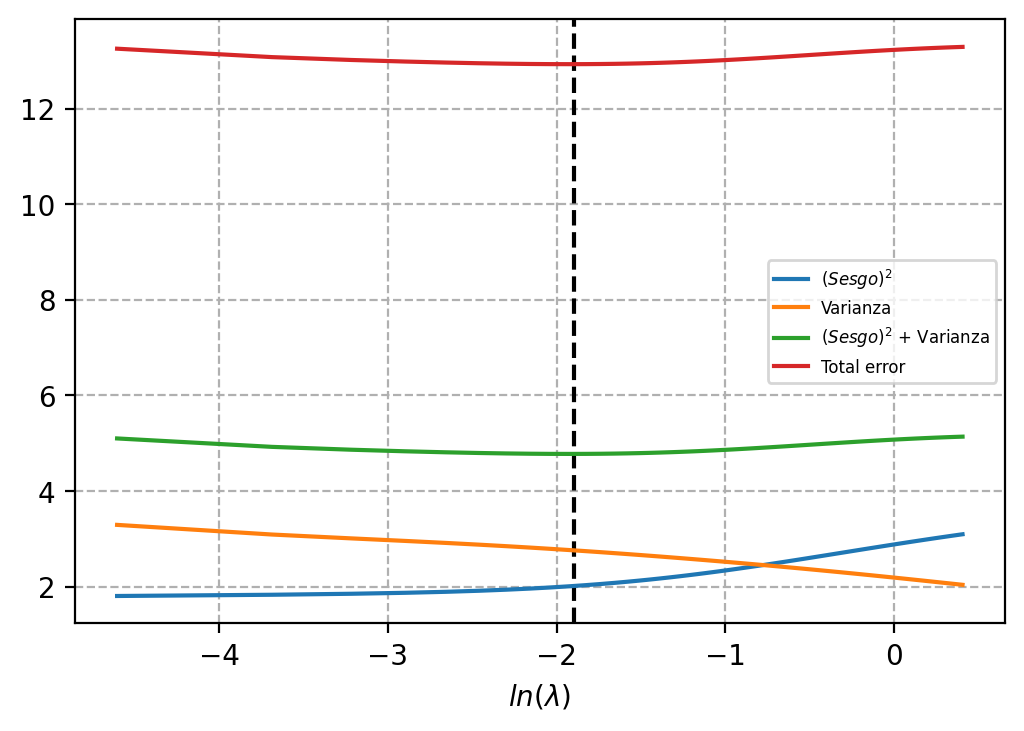

In [99]:
# Definimos el h(x) = E[t|x] 
# Para esto, tomamos el promedio de los valores de t para cada x. 
hx = np.mean(tm, axis=1)

# ------------------------------------------------------------------------------
#  ENTRENAMIENTO 
# ------------------------------------------------------------------------------
# --------- Función de Base: Exponencial

x_train = xm            # Asignamos los valores de x para el entranamiento
x_test = xm 

# Definimos el rango de valores de Lambda
rango = 100
rl = np.linspace(0.01, 1.5, num=rango)
datap = np.zeros((3, rango))

for i in range(rango):
  # Realizamos el entrenamiento para los 5 Datasets que tenemos disponibles.
  D = 5 
  yxd = np.zeros_like(tm)
  for d in range(D):
    t_train = tm[:,d] 

    # Construimos la matriz phi
    M = 5  # Numero de orden de nuestro polinomio
    phi = np.zeros((len(x_train), M+1))
    for m in range(M+1):
      phi[:,m] = x_train**m

    # Definimos el parametro de regularizacion
    lambd = rl[i]

    # Calculamos el vector de coeficiente Wml, este es nuestro W inicial. 
    Wml = np.linalg.pinv( lambd*np.identity(M+1) + phi.T @ phi ) @ phi.T @ t_train

    # Validación de los parametros W calculados
    y = np.poly1d(np.flip(Wml, 0))  # Función estimada con el entrenamiento
    yxd[:,d] = y(x_test)

  # Calculo del (Bias)2 - Sesgo:
  Eyxd = np.mean(yxd, axis=1)      # Se calcula la media de todos los modelos realizados
  bias2 = np.mean((Eyxd - hx)**2)
  datap[0,i] = bias2

  # Calculo de la varianza:
  var = np.mean((yxd - np.column_stack((Eyxd,Eyxd,Eyxd,Eyxd,Eyxd)))**2)
  datap[1,i] = var

  # Calculo del Error intrinseco: 
  noise = np.mean((tm - np.column_stack((hx,hx,hx,hx,hx)))**2)
  datap[2,i] = noise

# Plot - Comparacion de estimados con datos iniciales
fig = plt.figure(dpi=200)

plt.plot(np.log(rl), datap[0,:], label='$(Sesgo)^2$', zorder=4)
plt.plot(np.log(rl), datap[1,:], label='Varianza', zorder=4)
plt.plot(np.log(rl), datap[0,:]+datap[1,:], label='$(Sesgo)^2$ + Varianza', zorder=4)
plt.plot(np.log(rl), datap[0,:]+datap[1,:]+datap[2,:], label='Total error', zorder=4)
plt.axvline(x=-1.9, c='k', ls='--')

plt.xlabel(r'$ln(\lambda)$')
plt.grid(True, linestyle='--')
plt.legend(fontsize=6)

h(x) shape:  (10,) 

Wml para el Train set N°  0  es:  [ 0.98237487  2.64892041  4.54738488 -3.88211062  0.87316975 -0.06158623]
Wml para el Train set N°  1  es:  [-3.406736    1.61181063  3.71201608 -1.89187558  0.24860618 -0.00673112]
Wml para el Train set N°  2  es:  [-2.96253205  6.03401271  0.92011755 -2.39699626  0.60607993 -0.04240048]
Wml para el Train set N°  3  es:  [-4.32037197  4.38429541  4.22445852 -3.84293496  0.90466245 -0.06736354]
Wml para el Train set N°  4  es:  [-0.5054614  -0.16964549  1.25368225  0.16804907 -0.25683792  0.03349886]

y(x|D) shape:  (10, 5) 

-------------------------------------------

(bias)^2 = 2.016768124754676
Variance = 2.7612954316979357
noise = 8.14918299944777 



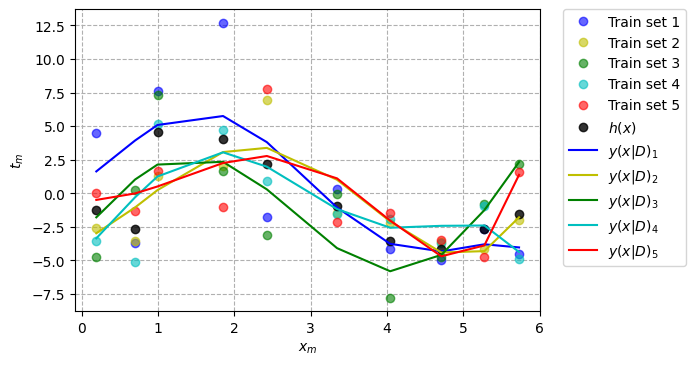

In [101]:
# Definimos el h(x) = E[t|x] 
# Para esto, tomamos el promedio de los valores de t para cada x. 
hx = np.mean(tm, axis=1)
print('h(x) shape: ', hx.shape, '\n')

# ------------------------------------------------------------------------------
#  ENTRENAMIENTO 
# ------------------------------------------------------------------------------
# --------- Función de Base: Exponencial

x_train = xm            # Asignamos los valores de x para el entranamiento
x_test = xm 

# Realizamos el entrenamiento para los 5 Datasets que tenemos disponibles.
D = 5 
yxd = np.zeros_like(tm)
for d in range(D):
  t_train = tm[:,d] 

  # Construimos la matriz phi
  M = 5  # Numero de orden de nuestro polinomio
  phi = np.zeros((len(x_train), M+1))
  for m in range(M+1):
    phi[:,m] = x_train**m

  # Definimos el parametro de regularizacion
  lambd = 0.15

  # Calculamos el vector de coeficiente Wml, este es nuestro W inicial. 
  Wml = np.linalg.pinv( lambd*np.identity(M+1) + phi.T @ phi ) @ phi.T @ t_train
  print('Wml para el Train set N° ',d,' es: ', Wml)

  # Validación de los parametros W calculados
  y = np.poly1d(np.flip(Wml, 0))  # Función estimada con el entrenamiento
  yxd[:,d] = y(x_test)

# Plot - Comparacion de estimados con datos iniciales
fig = plt.figure(dpi=100)

plt.plot(x_train, tm[:,0], 'bo', label='Train set 1', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,1], 'yo', label='Train set 2', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,2], 'go', label='Train set 3', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,3], 'co', label='Train set 4', zorder=4, alpha=0.6)
plt.plot(x_train, tm[:,4], 'ro', label='Train set 5', zorder=4, alpha=0.6)

plt.plot(x_train, hx, 'ko', label=r'$h(x)$', zorder=4, alpha=0.8)

plt.plot(x_test, yxd[:,0], 'b', label=r'$y(x|D)_1$', zorder=4)
plt.plot(x_test, yxd[:,1], 'y', label=r'$y(x|D)_2$', zorder=4)
plt.plot(x_test, yxd[:,2], 'g', label=r'$y(x|D)_3$', zorder=4)
plt.plot(x_test, yxd[:,3], 'c', label=r'$y(x|D)_4$', zorder=4)
plt.plot(x_test, yxd[:,4], 'r', label=r'$y(x|D)_5$', zorder=4)

plt.xlabel(r'$x_m$')
plt.ylabel(r'$t_m$')
plt.grid(True, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

print('\ny(x|D) shape: ', yxd.shape, '\n')
print('-------------------------------------------\n')

# Calculo del (Bias)2 - Sesgo:
Eyxd = np.mean(yxd, axis=1)      # Se calcula la media de todos los modelos realizados
bias2 = np.mean((Eyxd - hx)**2)
print('(bias)^2 =', bias2)

# Calculo de la varianza:
var = np.mean((yxd - np.column_stack((Eyxd,Eyxd,Eyxd,Eyxd,Eyxd)))**2)
print('Variance =', var)

# Calculo del Error intrinseco: 
noise = np.mean((tm - np.column_stack((hx,hx,hx,hx,hx)))**2)
print('noise =', noise, '\n')


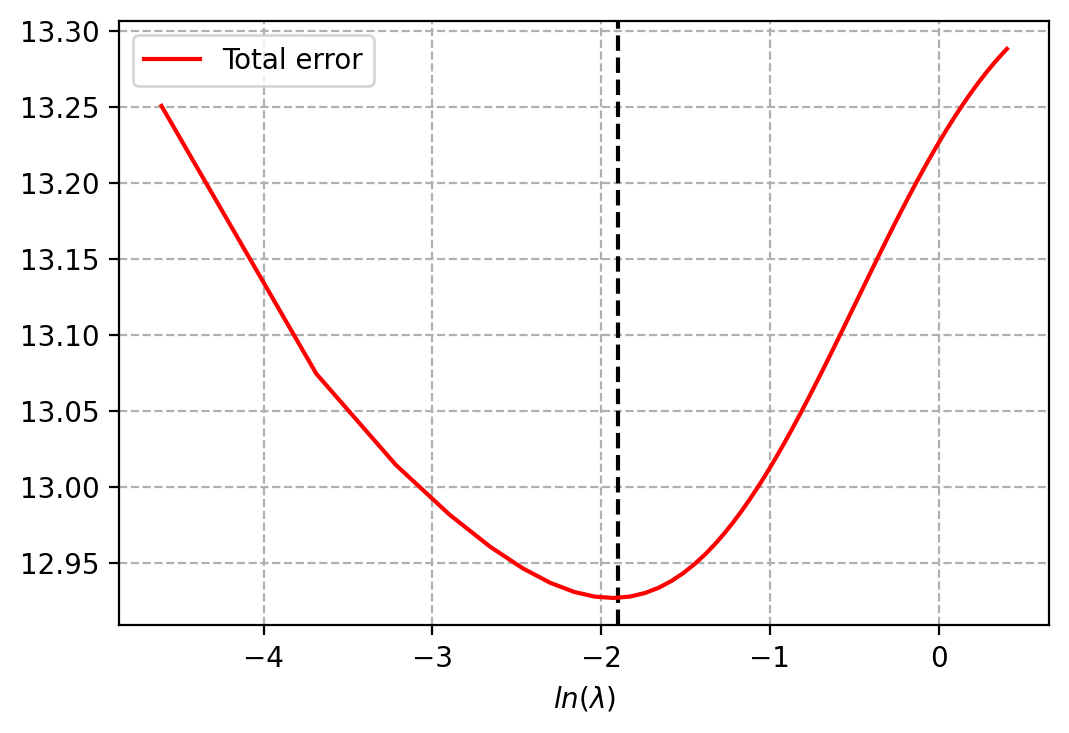

In [102]:
fig = plt.figure(dpi=200)

plt.plot(np.log(rl), datap[0,:]+datap[1,:]+datap[2,:], 'r', label='Total error', zorder=4)
plt.axvline(x=-1.9, c='k', ls='--')
plt.xlabel(r'$ln(\lambda)$')
plt.grid(True, linestyle='--')
plt.legend(fontsize=10)